# Descriptive statistics – Min, Max, Medium etc. 

To get an overview of the data, descriptive statistics are used. These include values such as the range, median, and mean. They will help to observe the central tendency, identify outliers, and understand the overall behavior of the data.

For this reason, the `Pandas' library added.

In [6]:
from pathlib import Path
import pandas as pd
import geopandas as gp

base_path = Path.cwd().parents[0]
INPUT = base_path / "00_data"
OUTPUT = Path.cwd().parents[0] / "out"

The data of interest is loaded into the environment.

In [26]:
#data = pd.read_csv(OUTPUT / "clipped_layer.csv")
data = gp.read_file(INPUT / "LBM2018_IS_DD_shp - Copy/LBM2018_IS_DD.shp")
                    

Then the `describe` function of `Pandas` is used to create a summary. 

`````{admonition}  The describe function
:class: note
By default, the `describe` function creates a summary for the numerical columns.
`````

The statistical summary generated by `describe` function for each `Numerical` column:
- **`Count`**: Number of values
- **`Mean`**: Average of the values
- **`Std `**: spread of the data (Standard deviation)
- **`Min`**: The minimum value
- **`25%`**: lower quartile
- **`50%`**: median
- **`75%`**: upper quartile
- **`Max`**: The Maximum value

In [27]:
num_statistics = data.describe()
print(num_statistics)

                CLC    Biotpkt201     Shape_Leng    Shape_Area
count  33923.000000  33923.000000   33923.000000  3.392300e+04
mean     149.408749      8.804984     590.458984  9.662175e+03
std      111.819302      4.784322    6169.780269  4.671589e+04
min        0.000000      0.000000       0.011841  5.620002e-06
25%      112.000000      5.271487     136.936684  2.437363e+02
50%      121.000000      7.000000     306.549587  2.016611e+03
75%      231.000000     12.594189     564.009207  8.515168e+03
max      512.000000     20.164493  612646.861125  3.249895e+06


`````{admonition} describe(include='all')
:class: tip
To obtain the summary statistics for all columns, including **both numerical and categorical** data, the `describe` function should be called with the `include='all'` parameter.
`````

The additional statistical summary generated by `describe(include='all')` for `Categorical` Columns:
- **`unique`**: number of distinct values
- **`top`**: most frequent value (mode)
- **`Freq`**: frequency of the top value

In [28]:
statistics = data.describe(include='all')
print(statistics)

       KS_IS CLC_st1  CLC18           CLC    Biotpkt201     Shape_Leng  \
count   6654   33923  27269  33923.000000  33923.000000   33923.000000   
unique    13      26     24           NaN           NaN            NaN   
top       WP     112    112           NaN           NaN            NaN   
freq    1768    7187   7187           NaN           NaN            NaN   
mean     NaN     NaN    NaN    149.408749      8.804984     590.458984   
std      NaN     NaN    NaN    111.819302      4.784322    6169.780269   
min      NaN     NaN    NaN      0.000000      0.000000       0.011841   
25%      NaN     NaN    NaN    112.000000      5.271487     136.936684   
50%      NaN     NaN    NaN    121.000000      7.000000     306.549587   
75%      NaN     NaN    NaN    231.000000     12.594189     564.009207   
max      NaN     NaN    NaN    512.000000     20.164493  612646.861125   

          Shape_Area                                           geometry  
count   3.392300e+04                 

`````{admonition} NaN values description!
:class: note , dropdown
In some cases, there are `NaN` values in the columns. These could indicate missing values or situations where a statistical calculation is not possible for certain columns, especially for text-based data.
**ex:** metrics such as mean, min, and max do not apply to string columns!
`````

To better understand the analysis, using a `plot` can offer a clearer visual summary of the data in each column.

Using `matplotlib` library with various packages allows for the creation of helpful visualizations.

In [29]:
import matplotlib.pyplot as plt

For example, `box` plot is a great way to quickly review the max, min, median, and quartiles of a dataset. It is just needed to call the `kind` of the plot which is needed for the required column of the dataset.

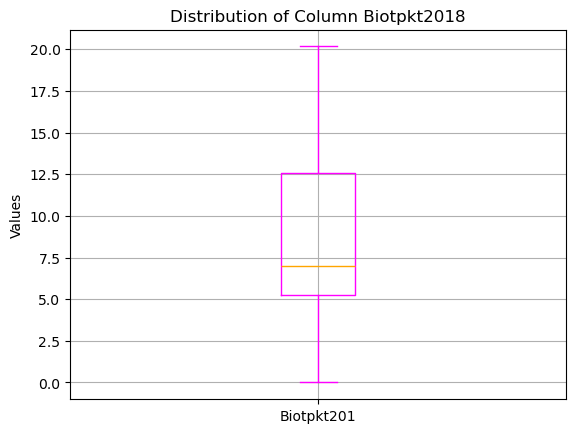

In [30]:
data['Biotpkt201'].plot(kind='box',
                        color= 'magenta', 
                        medianprops=dict(color='orange'))

plt.title('Distribution of Column Biotpkt2018')
plt.ylabel('Values') 

plt.grid(True)
plt.show()



`````{admonition} More Plots?
:class: tip, dropdown
To find the most suitable plot based on the needs of the project, the provided link offers a wide range of plot types with different customization options.
https://matplotlib.org/stable/plot_types/index.html
`````

##

Based on the attributes in the dataset which mentioned in the previous chapter "selecting and filtering data", the `CLC_st1` includes the land use classifications. 



To find the area allocated to  each group of landuses, the dataset should be groped by the unique land uses and calculate the sum of the areas.


`````{admonition} More Plots?
:class: note, 

In case the output is going to be used as a DataFrame for further analysis, using `reset_index` to create a new index for calculated features is recommended.
`````

The output shows the area allocated to each land use with specific indexes.

Based on the output for example 4.183657e+04 equal to 41836.57 square meter allocated to the landcover class of 221, which is the Vineyard class.

In [31]:
clc_areas = data.groupby("CLC_st1")["Shape_Area"].sum().reset_index()
print (clc_areas)

   CLC_st1    Shape_Area
0      111  6.029067e+06
1      112  5.542012e+07
2      121  2.814708e+07
3      122  2.939897e+07
4      123  2.688245e+05
5      124  2.189995e+06
6      131  4.539818e+05
7      132  5.479415e+05
8      133  9.029719e+03
9      141  6.653616e+06
10     142  1.338334e+07
11     211  5.584422e+07
12     221  2.637234e+05
13     222  2.088464e+06
14     231  3.915726e+07
15     311  1.685467e+07
16     312  3.483364e+07
17     313  2.354910e+07
18     321  1.535908e+05
19     322  1.147964e+06
20     324  4.669852e+06
21     332  2.305525e+04
22     333  6.014263e+04
23     411  3.089377e+04
24     511  4.750141e+06
25     512  1.841263e+06


It is also possible to convert the area column from square meter to hectares:

In [32]:
clc_areas["Shape_Area"] = clc_areas["Shape_Area"] / 10000  
print(clc_areas)

   CLC_st1   Shape_Area
0      111   602.906696
1      112  5542.011657
2      121  2814.707765
3      122  2939.897165
4      123    26.882449
5      124   218.999525
6      131    45.398179
7      132    54.794153
8      133     0.902972
9      141   665.361585
10     142  1338.333691
11     211  5584.422430
12     221    26.372341
13     222   208.846402
14     231  3915.726494
15     311  1685.467282
16     312  3483.364077
17     313  2354.910131
18     321    15.359083
19     322   114.796382
20     324   466.985162
21     332     2.305525
22     333     6.014263
23     411     3.089377
24     511   475.014072
25     512   184.126269


To find the percentage that belongs to each class:

First the total area of the landcovers calculated, then the percentage calculated using that and stored in a column called `share` in the same dataset:

In [44]:
total_area = clc_areas["Shape_Area"].sum()
clc_areas["share"] = (clc_areas["Shape_Area"] / total_area) * 100

print(total_area)
print(clc_areas)

32776.99512742235
   CLC_st1   Shape_Area      share
0      111   602.906696   1.839420
1      112  5542.011657  16.908236
2      121  2814.707765   8.587449
3      122  2939.897165   8.969392
4      123    26.882449   0.082016
5      124   218.999525   0.668150
6      131    45.398179   0.138506
7      132    54.794153   0.167173
8      133     0.902972   0.002755
9      141   665.361585   2.029965
10     142  1338.333691   4.083149
11     211  5584.422430  17.037628
12     221    26.372341   0.080460
13     222   208.846402   0.637174
14     231  3915.726494  11.946569
15     311  1685.467282   5.142226
16     312  3483.364077  10.627466
17     313  2354.910131   7.184643
18     321    15.359083   0.046859
19     322   114.796382   0.350235
20     324   466.985162   1.424735
21     332     2.305525   0.007034
22     333     6.014263   0.018349
23     411     3.089377   0.009425
24     511   475.014072   1.449230
25     512   184.126269   0.561755


For effectively visualizing the distribution of continuous data and frequency of data across consecutive intervals also the `histograms` can be used.



`````{admonition} 
:class: caution, 

Histograms are just able to represent the frequency of numeric values.

In case the type of the attribute is string like here for landcover classes, for showing frequency there are 2 methods:

1. Data should be converted to numeric values.
2. Calculate the frequency of the data as it explained in the Selecting and Filtering chapter, and then use bar chart for plot. 
`````

Converting string values to numeric values can be done using the `astype` method.

In [43]:
numeric_column= clc_areas['CLC_st1'].astype(float)

OR using the `to_numeric` method from `Pandas` package.

In [45]:
numeric_column= pd.to_numeric(clc_areas['CLC_st1'])

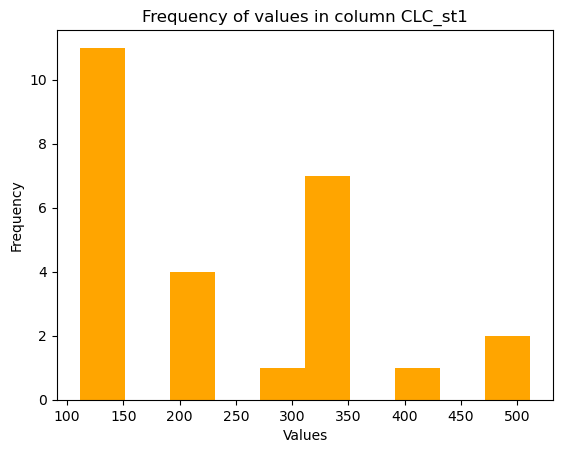

In [46]:
numeric_column.plot(kind='hist', color= 'orange')
plt.title('Frequency of values in column CLC_st1')
plt.xlabel('Values') 
plt.show()


In [ ]:
##labels 

For using the bar charts with string data and calculating the frequency of the data: 

In [50]:
#a = clc_areas['CLC_st1'].value_counts()
#a.plot(kind='bar', color='orange')  

Also if the relationship between two variables in a dataset is important, plots such as `scatter` plot can be helpful for visualizing and understanding the relation.

In [ ]:
plt.scatter(data['CLC_st1'], data['Biotpkt201'], alpha=0.2, color='red', label='Landcover')
plt.scatter(data['CLC_st1'], data['Biotpkt201'], alpha=0.2, color='skyblue', label='Biodiversity')
plt.title("Relationship Between Landcover and Biodiversity")
plt.xlabel('CLC_st1')
plt.ylabel('Biotpkt2018')
plt.legend()
plt.show()
